<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_in_1_week/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<Axes: xlabel='rating', ylabel='count'>

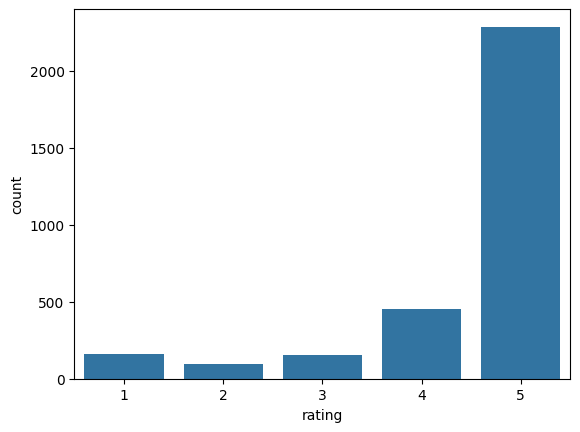

In [ ]:
sns.countplot(x='rating',data=data)

<Axes: >

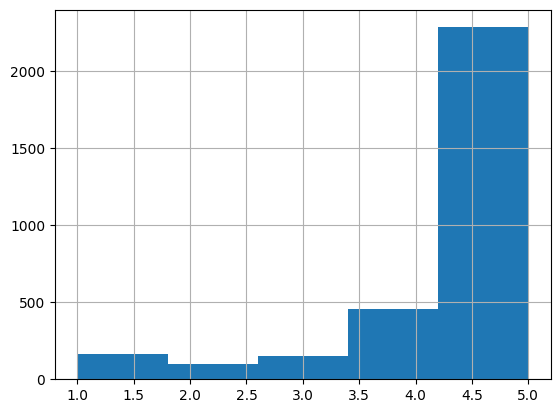

In [ ]:
data['rating'].hist(bins=5)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
positive=data[data['feedback']==1]
negative=data[data['feedback']==0]

In [ ]:
variation=pd.get_dummies(data['variation'],drop_first=True).astype(int)

In [ ]:
data.drop(['variation','date','rating'],axis=1,inplace=True)

In [ ]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
df_alexa=data.merge(variation,left_index=True,right_index=True)

In [ ]:
df_alexa.dropna(inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_count_vectorizer=vectorizer.fit_transform(df_alexa['verified_reviews'])

In [ ]:
df_alexa.drop('verified_reviews',axis=1,inplace=True)

In [ ]:
encoded_reviewes=pd.DataFrame(alexa_count_vectorizer.toarray())

In [ ]:
df_alexa=pd.concat([df_alexa,encoded_reviewes],axis=1)

In [ ]:
df_alexa.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_alexa.dropna(inplace=True)

In [ ]:
X = df_alexa.drop('feedback',axis=1)
y = df_alexa['feedback']
X.columns = X.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.18      0.28        78
         1.0       0.93      0.99      0.96       867

    accuracy                           0.92       945
   macro avg       0.78      0.59      0.62       945
weighted avg       0.91      0.92      0.90       945



<Axes: >

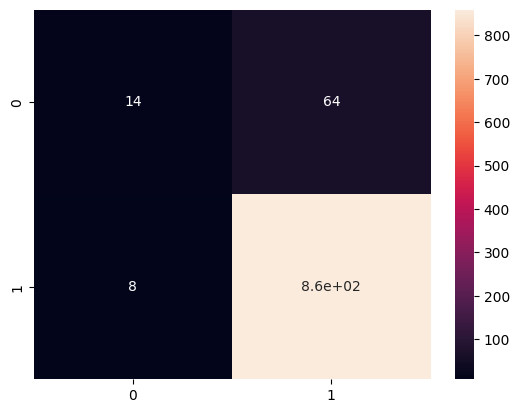

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True)